1. Понимание бизнес-проблемы:
   Допустим, бизнес-заказчик осуществляет оптовую торговлю вином и хочет при помощи машинной модели оптимизировать номенклатуру закупаемого вина, повысив при этом его продажи.
   - Цель проекта: с точностью 65% предсказать качество закупаемого типа вина на основе его характеристик.
   - т.к. основным видом деятельности компании является торговля вином, важность данной проблемы максимальная. Потенциальные выгоды от ее решения - оптимизированный продуктовый портфель, повышение выручки, сокращение расходов.

2. Понимание данных:
   - Изучим доступные данные о вине, включая характеристики вина и его качество.
   - Определим типы данных, пропущенные значения и возможные проблемы с данными.

In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
# Загрузка данных
df = pd.read_csv('winequalityN.csv')

In [196]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


3. Подготовка данных:
   - Очистим данные от пропущенных значений и дубликатов.
   - Преобразуем категориальные переменные в числовые.
   - Разделите данные на обучающую и тестовую выборки.

In [ ]:
# Очистка данных

In [231]:
# обнаружим и удалим дубликаты значений
df.duplicated().sum()

1168

In [232]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [233]:
# получим количество нулевых значений в каждом параметре
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [234]:
# заменим пропуски среднеарифметическим по каждому столбцу, где применимо
df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

In [235]:
# пропусков нет
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   object 
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 582.9+ KB


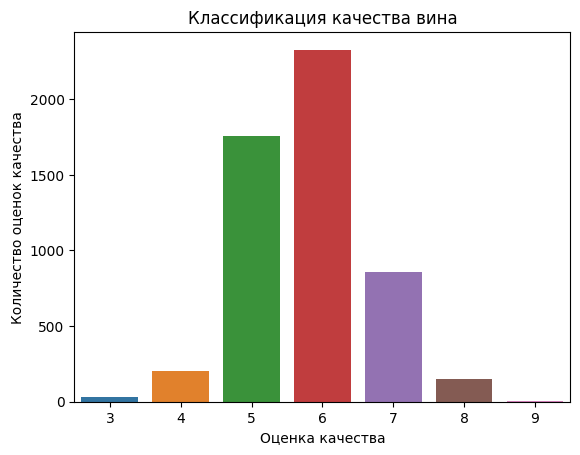

In [259]:
# ознакомимся со шкалой распределения количества оценок качества вина
sns.countplot(x= df['quality'])
plt.xlabel('Оценка качества')
plt.ylabel('Количество оценок качества')
plt.title('Классификация качества вина');

In [215]:
# преобразуем категориальные (цвет вина) значения в числовые
df_encoded = pd.get_dummies(df['type'])
df_1 = pd.concat([df, df_encoded], axis=1)
df_1.drop("type",axis=1,inplace=True)
df_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.470000,9.6,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.820000,9.5,6,1,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.533268,11.2,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1,0


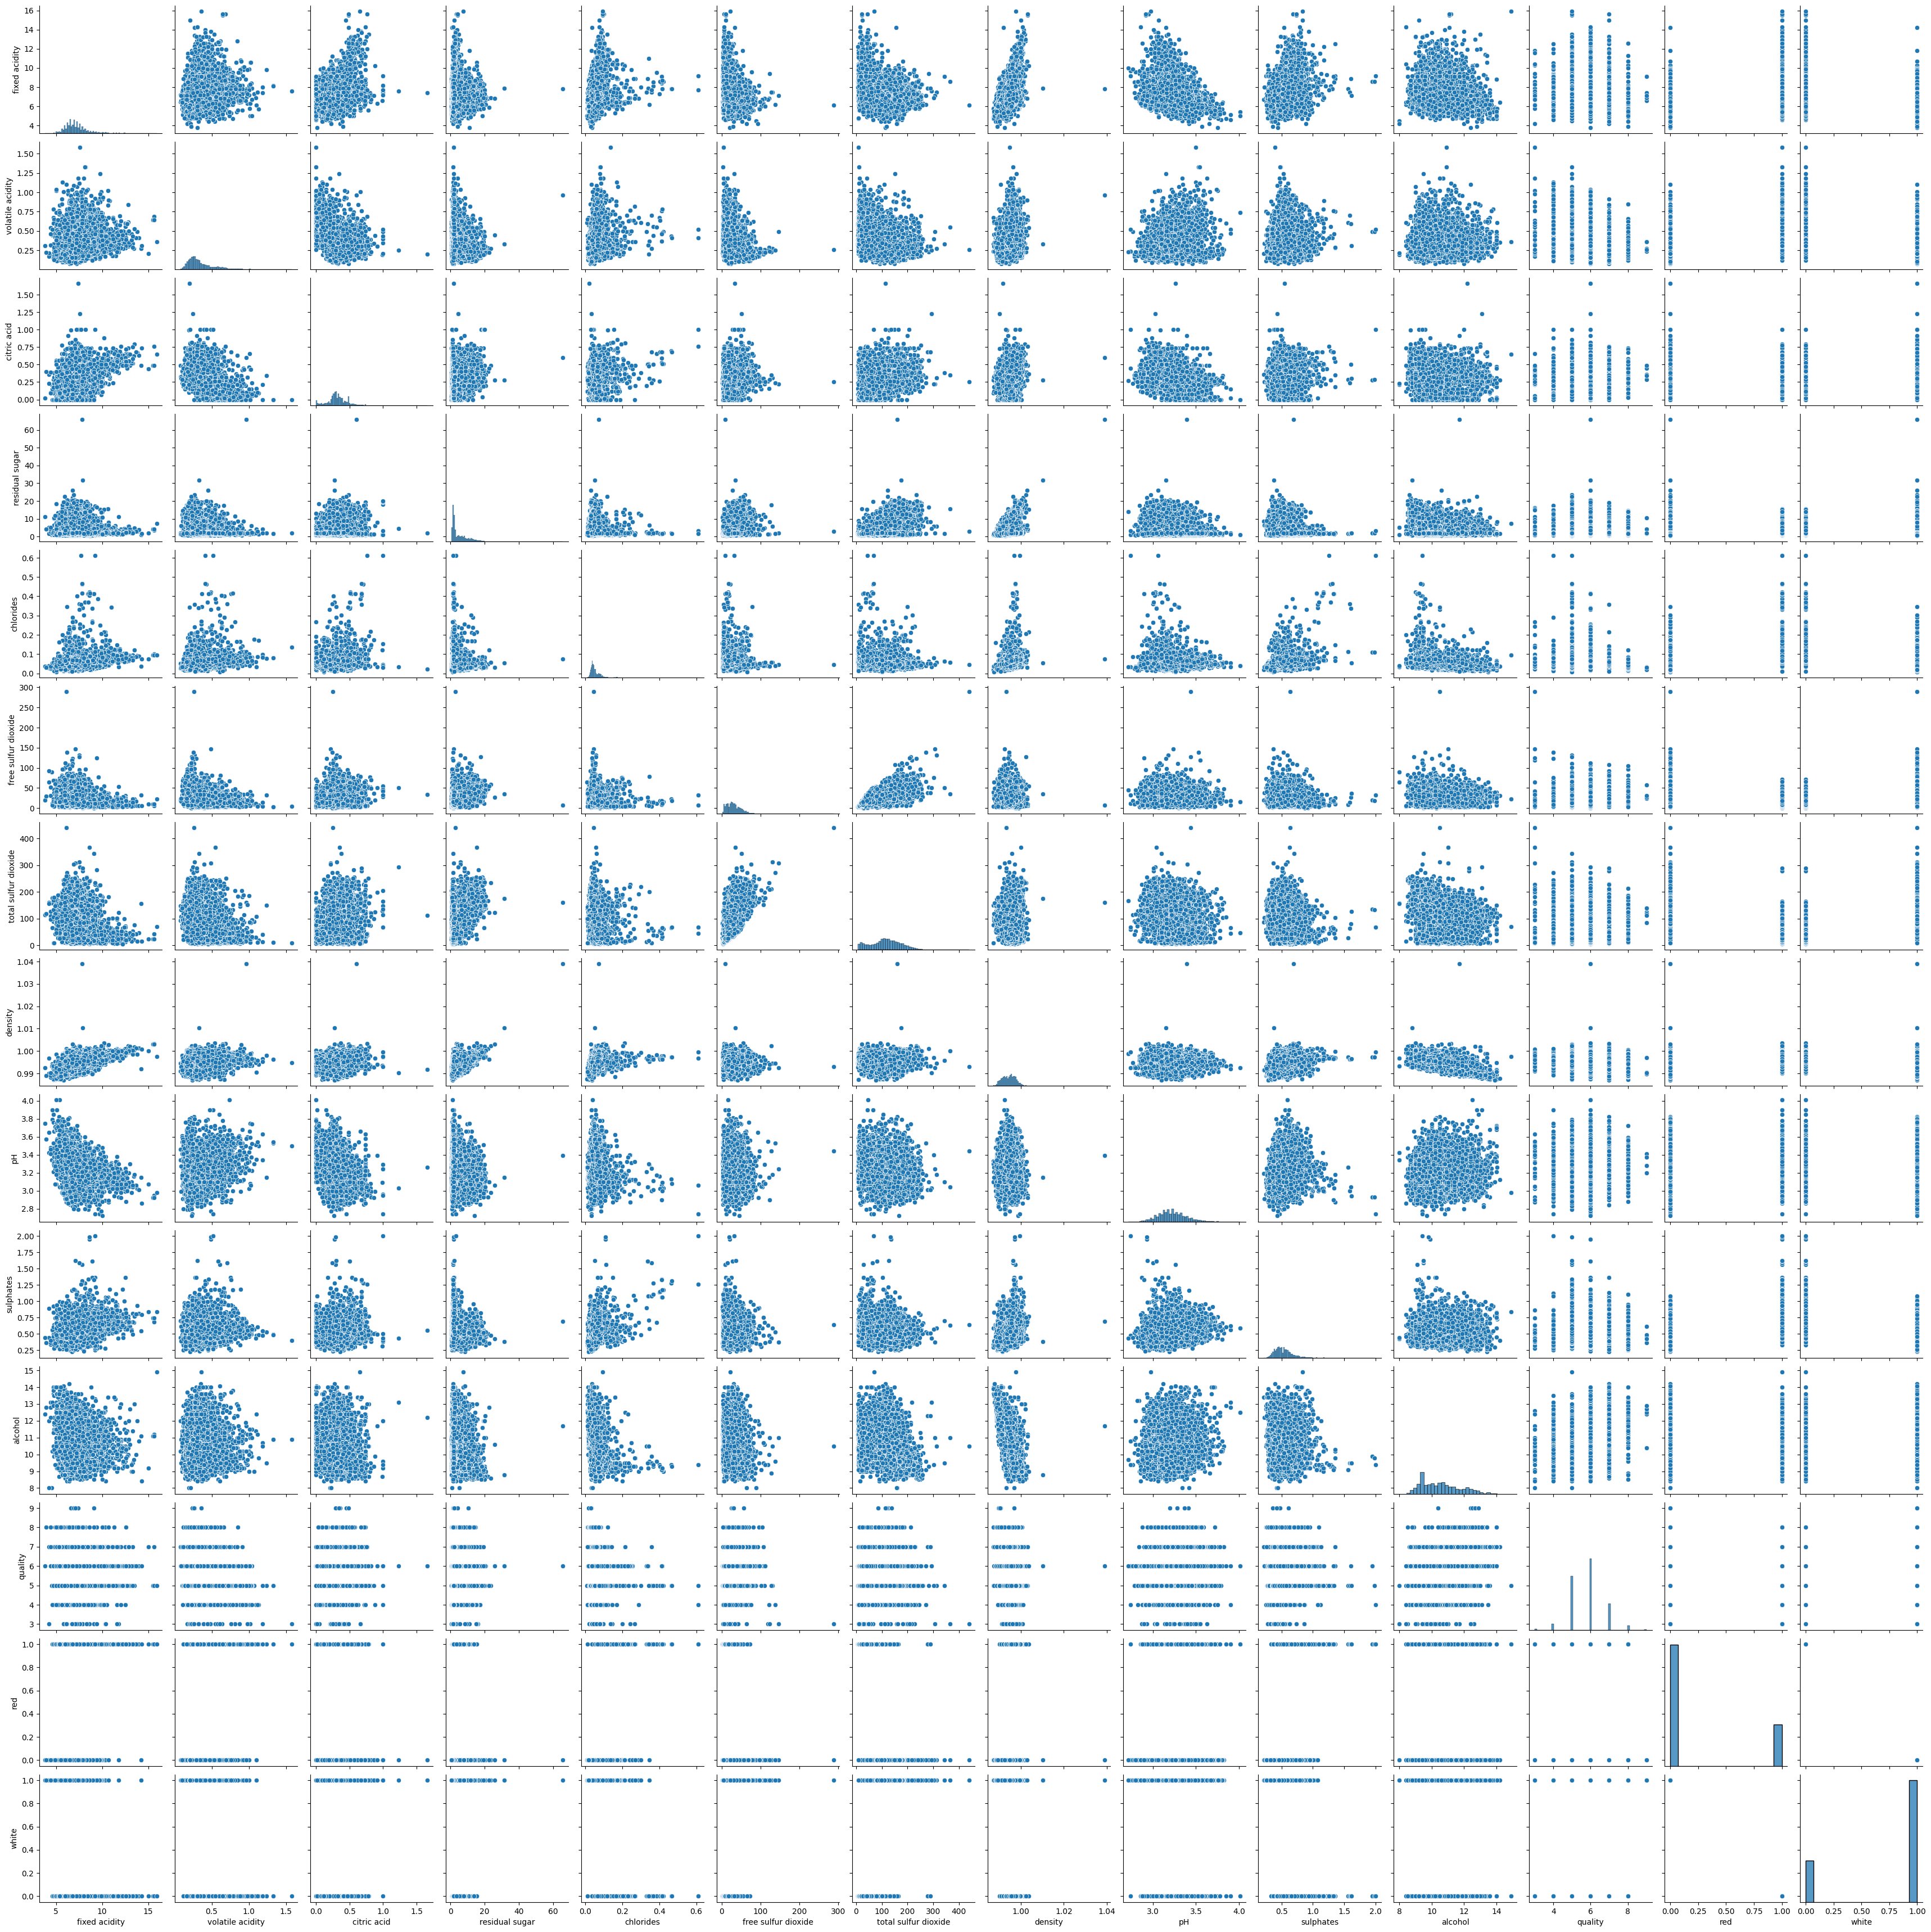

In [237]:
# Проанализируем корреляцию между параметрами

sns.pairplot(df_1)
plt.show()

In [242]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_1.drop(columns= ['quality'])
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,0,1
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.470000,9.6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.820000,9.5,1,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.533268,11.2,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,1,0


In [243]:
y = df_1['quality'].astype(int)
y

0       6
1       6
2       6
3       6
6       6
       ..
6491    6
6492    5
6493    6
6495    5
6496    6
Name: quality, Length: 5329, dtype: int64

In [244]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5329, 13)
y shape: (5329,)


In [245]:
# проанализируем значимость каждого параметра
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X, y)

ExtraTreesClassifier()

In [246]:
print(etc.feature_importances_)

[0.07940775 0.09661865 0.08201807 0.08326976 0.08387298 0.08588528
 0.09027577 0.09006128 0.08283821 0.08545307 0.13300892 0.00401961
 0.00327065]


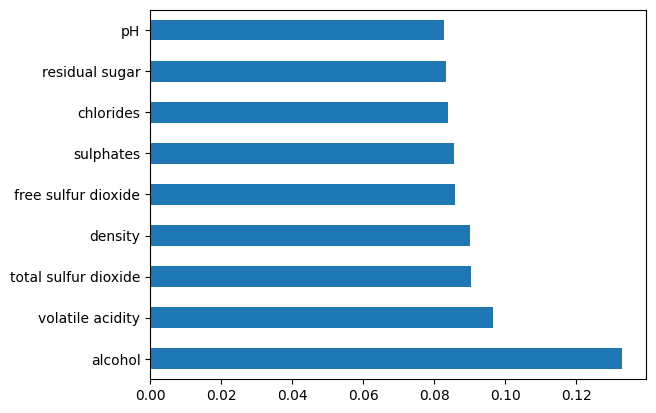

In [247]:
feature_importances = pd.Series(etc.feature_importances_, index = X.columns)
feature_importances.nlargest(9).plot(kind = "barh")
plt.show()

In [248]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [252]:
# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. Моделирование:
   - Выберем модель обучения предсказания качества вина.
   - Обучим модель на обучающей выборке.
   - Оценим качество модели на тестовой выборке.

In [253]:
# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [254]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

5. Оценка:
   - Оценим качество модели с помощью метрики точности.
   - Сравним результаты с бизнес-требованиями и определим, достигнуты ли поставленные цели.
   

In [255]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5703564727954972


Цель не достигнута